In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Bước 1: Xác định bài toán:
Đây là bài toán dự đoán số người chết hàng năm do ung thư tại các hạt của Mỹ. Thông tin các thuộc tính bằng tiếng Việt có thể xem tại đây : https://docs.google.com/document/d/1s87Ta9DAaFiAsdVxVt_7P-kLrfM9Lq9RH8gMGpbdMVA/edit?usp=sharing
Ta tiến hành phân tích thăm dò bộ dữ liệu

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Đồ án Phân tích dữ liệu thầy Thế Sơn/cancer.csv", encoding = "ISO-8859-1")
df.sample(10)



,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,MedianAgeFemale,Geography,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
2286,61.0,31,159.8,326.4,29244,16400,33.7,0.000000,"[22640, 34218.1]",40.3,39.2,43.4,"Telfair County, Georgia",2.37,40.1,33.2,50.9,NaN,1.2,49.3,5.4,32.4,4.4,41.8,33.3,29.9,46.0,32.8,57.876462,40.363060,0.060916,1.169591,44.564190,2.772574
2328,792.0,271,154.8,458.6,43489,207478,18.0,106.035339,"(42724.4, 45201]",32.8,32.0,33.6,"Canyon County, Idaho",2.98,53.8,19.0,40.7,NaN,3.1,32.0,12.5,56.3,9.4,58.0,NaN,38.1,34.9,21.5,90.613359,0.441381,0.793280,4.094590,55.468263,6.940189
2767,1456.0,579,181.6,458.5,44050,297302,17.7,531.446139,"(42724.4, 45201]",38.2,36.9,39.3,"Spartanburg County, South Carolina",2.58,49.2,14.5,32.8,NaN,8.6,29.8,14.6,55.8,8.9,62.6,49.1,43.7,34.3,19.9,72.993064,20.804148,2.230119,1.958866,48.685983,5.772383
1230,326.0,137,208.6,495.5,38465,55191,19.3,0.000000,"(37413.8, 40362.7]",40.7,39.5,41.9,"Pearl River County, Mississippi",2.61,51.9,14.0,32.2,NaN,1.1,31.4,9.6,46.2,12.1,55.9,41.9,36.8,37.6,21.3,84.083992,13.557142,0.143126,0.710196,51.868388,4.728190
1446,56.0,32,188.4,336.8,31734,14295,31.7,0.000000,"[22640, 34218.1]",40.5,36.1,45.6,"Hamilton County, Florida",2.35,39.3,36.9,44.4,18.7,0.0,37.4,7.2,33.1,15.8,49.7,35.3,29.4,47.8,28.4,60.722473,34.095172,0.347343,2.181313,44.325939,7.149201
1702,819.0,328,179.4,478.4,43343,125593,15.0,39.811136,"(42724.4, 45201]",42.8,41.0,44.5,"Blair County, Pennsylvania",2.41,50.0,8.4,40.5,NaN,10.0,48.2,13.1,55.5,6.4,70.6,51.9,46.4,38.3,18.7,95.931925,1.594331,0.711755,0.213527,48.791002,4.508675
1877,9.0,3,142.5,435.8,63054,1554,8.6,0.000000,"(61494.5, 125635]",44.9,43.4,47.1,"Irion County, Texas",2.50,67.0,21.8,36.6,NaN,0.0,34.9,10.5,62.2,4.4,71.3,57.7,51.7,23.2,7.4,90.085158,0.000000,0.000000,6.265207,63.221884,5.459770
96,579.0,206,159.4,477.0,52149,101973,9.9,235.356418,"(51046.4, 54545.6]",41.0,40.1,41.8,"Fond du Lac County, Wisconsin",2.40,54.8,10.6,33.8,NaN,6.2,38.5,14.8,64.6,5.3,77.1,60.3,54.8,30.6,14.4,93.585165,1.164639,1.315738,1.864207,53.519686,4.541733
161,272.0,123,164.5,375.8,38403,65764,23.4,0.000000,"(37413.8, 40362.7]",34.8,32.9,36.7,"Chaves County, New Mexico",2.72,48.1,23.1,28.7,NaN,1.7,27.0,11.9,52.9,7.6,49.6,36.6,32.2,44.9,29.4,79.576363,1.747428,0.791661,13.696798,48.112885,8.496374
2984,67.0,25,129.6,426.7,52616,10832,11.5,0.000000,"(51046.4, 54545.6]",43.7,42.1,45.9,"Mitchell County, Iowa",2.41,59.7,18.1,41.3,NaN,6.6,44.2,11.3,62.9,3.2,73.4,NaN,43.9,34.8,14.3,98.801338,0.139379,0.092920,0.111503,57.411657,6.073649


# Phân tích thăm dò
Tiến hành tìm hiểu bộ dữ liệu về thông tin, kích thước, kiểu dữ liệu, các phân phối trên các thuộc tính

In [ ]:
print('Dataset có tổng cộng ', df.shape[0], " sample và ", df.shape[1], " feature")

Dataset có tổng cộng  3047  sample và  34  feature


kiểm tra kiểu dữ liệu
nhận thấy các thuộc tính đa phần là số
Có 2 thuộc tính dạng object là tên hạt và thu nhập bình quân

In [ ]:
df.dtypes

avgAnnCount                float64
avgDeathsPerYear             int64
TARGET_deathRate           float64
incidenceRate              float64
medIncome                    int64
popEst2015                   int64
povertyPercent             float64
studyPerCap                float64
binnedInc                   object
MedianAge                  float64
MedianAgeMale              float64
MedianAgeFemale            float64
Geography                   object
AvgHouseholdSize           float64
PercentMarried             float64
PctNoHS18_24               float64
PctHS18_24                 float64
PctSomeCol18_24            float64
PctBachDeg18_24            float64
PctHS25_Over               float64
PctBachDeg25_Over          float64
PctEmployed16_Over         float64
PctUnemployed16_Over       float64
PctPrivateCoverage         float64
PctPrivateCoverageAlone    float64
PctEmpPrivCoverage         float64
PctPublicCoverage          float64
PctPublicCoverageAlone     float64
PctWhite            

# Tiền xử lí dữ liệu

## Xử lí với cột binnedInc
Dùng giá trị mean thay thế

In [ ]:
def break_binned(df, feature):
    avg = []
    list1 = []
    list2 = []
    for bin in df[feature].value_counts().index:   
        string = bin
        str1 = ''
        str2 = ''
        for i in range(len(string)):
            if (string[i] == ','):
                for j in range(1, i):
                    str1 += string[j]
                for k in range(i + 1, len(string) - 1):
                    str2 += string[k]
                list1.append(float(str1))
                list2.append(float(str2))
    for i in range(len(list1)):
        avg.append((list1[i] + list2[i])/2)

    return avg

def replace_binned(df, feature, avg):
    length = len(df[feature].value_counts().index)
    bin = df[feature].value_counts().index
    for i in range(len(df)):
        for j in range(length):
            if (df[feature][i] == bin[j]):
                df[feature][i] = avg[j]

avg = break_binned(df, 'binnedInc')
replace_binned(df, 'binnedInc', avg)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
df['binnedInc'] = df['binnedInc'].astype('float')
df.head()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,MedianAgeFemale,Geography,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,93564.75,39.3,36.9,41.7,"Kitsap County, Washington",2.54,52.5,11.5,39.5,42.1,6.9,23.2,19.6,51.9,8.0,75.1,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,49534.00,33.0,32.2,33.7,"Kittitas County, Washington",2.34,44.5,6.1,22.4,64.0,7.5,26.0,22.7,55.9,7.8,70.2,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,49534.00,45.0,44.0,45.8,"Klickitat County, Washington",2.62,54.2,24.0,36.6,NaN,9.5,29.0,16.0,45.9,7.0,63.7,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,43962.70,42.8,42.2,43.4,"Lewis County, Washington",2.52,52.7,20.2,41.2,36.1,2.5,31.6,9.3,48.3,12.1,58.4,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,49534.00,48.3,47.8,48.9,"Lincoln County, Washington",2.34,57.8,14.9,43.0,40.0,2.0,33.4,15.0,48.2,4.8,61.6,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


In [ ]:
df.dtypes

avgAnnCount                float64
avgDeathsPerYear             int64
TARGET_deathRate           float64
incidenceRate              float64
medIncome                    int64
popEst2015                   int64
povertyPercent             float64
studyPerCap                float64
binnedInc                  float64
MedianAge                  float64
MedianAgeMale              float64
MedianAgeFemale            float64
Geography                   object
AvgHouseholdSize           float64
PercentMarried             float64
PctNoHS18_24               float64
PctHS18_24                 float64
PctSomeCol18_24            float64
PctBachDeg18_24            float64
PctHS25_Over               float64
PctBachDeg25_Over          float64
PctEmployed16_Over         float64
PctUnemployed16_Over       float64
PctPrivateCoverage         float64
PctPrivateCoverageAlone    float64
PctEmpPrivCoverage         float64
PctPublicCoverage          float64
PctPublicCoverageAlone     float64
PctWhite            

## Xử lí dữ liệu thiếu


In [ ]:
#print(df.dtypes)
print('So luong du lieu thieu la: ', df.isnull().sum())

So luong du lieu thieu la:  avgAnnCount                   0
avgDeathsPerYear              0
TARGET_deathRate              0
incidenceRate                 0
medIncome                     0
popEst2015                    0
povertyPercent                0
studyPerCap                   0
binnedInc                     0
MedianAge                     0
MedianAgeMale                 0
MedianAgeFemale               0
Geography                     0
AvgHouseholdSize              0
PercentMarried                0
PctNoHS18_24                  0
PctHS18_24                    0
PctSomeCol18_24            2285
PctBachDeg18_24               0
PctHS25_Over                  0
PctBachDeg25_Over             0
PctEmployed16_Over          152
PctUnemployed16_Over          0
PctPrivateCoverage            0
PctPrivateCoverageAlone     609
PctEmpPrivCoverage            0
PctPublicCoverage             0
PctPublicCoverageAlone        0
PctWhite                      0
PctBlack                      0
PctAsian    

In [ ]:
# Vì cột PctSomeCol18_24 có hơn 2/3 giá trị khuyết nên bỏ cột
df.drop(['PctSomeCol18_24'], axis = 1, inplace = True)
# vì độ tương quan với biến target chỉ là -0.18 nên bỏ

In [ ]:
# tính % sample bị khuyết khi đã loại bỏ cột PctSomeCol18_24 
df2 = df.isnull()
count = 0
tong = 0
for i in range(df2.shape[0]):
  for j in range(df2.shape[1]):
    if(df2.iloc[i , j]) == True:
      count = count + 1
      break
  tong = tong + count
  count = 0
print('tong so sample thieu la: ',tong)

print('phan tram sample loi la', (tong/df2.shape[0])*100, "%")

tong so sample thieu la:  715
phan tram sample loi la 23.465703971119133 %


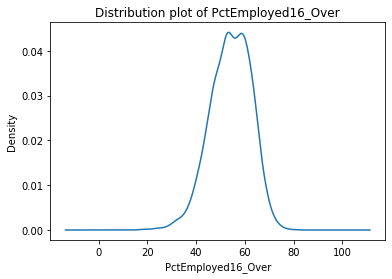

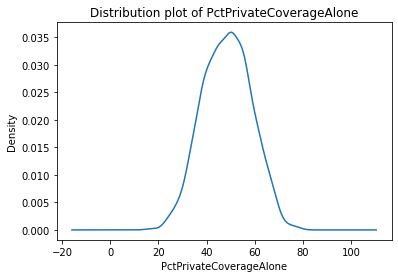

In [ ]:
#Ta xem đồ thị phân bố của 2 thuộc tính này để quyết định biến điền vào
df.PctEmployed16_Over.plot(kind = 'density')
plt.xlabel('PctEmployed16_Over')
plt.title('Distribution plot of PctEmployed16_Over' )
plt.show()
df.PctPrivateCoverageAlone.plot(kind = 'density')
plt.xlabel('PctPrivateCoverageAlone')
plt.title('Distribution plot of PctPrivateCoverageAlone' )
plt.show()

In [ ]:
# vì đều có phân bố đều nên ta thay thế bằng mean
mean = df.PctPrivateCoverageAlone.mean()
df['PctPrivateCoverageAlone'].fillna(mean , inplace = True)
mean1 = df.PctEmployed16_Over.mean()
df['PctEmployed16_Over'].fillna(mean1, inplace = True)


In [ ]:
df.to_csv('Cancel_Clean.csv', index= False)

## Chuẩn hóa dữ liệu bằng log-transformation

In [ ]:
df3 = df.copy()
# Log-Tranformed
for i in df3.columns.drop(['TARGET_deathRate', 'Geography']):
    df3[i] = np.log1p(df3[i])
    print(i)

print('Số lượng feature áp dụng log-transformed: ', len(df3.columns))
df = df3.copy()

avgAnnCount
avgDeathsPerYear
incidenceRate
medIncome
popEst2015
povertyPercent
studyPerCap
binnedInc
MedianAge
MedianAgeMale
MedianAgeFemale
AvgHouseholdSize
PercentMarried
PctNoHS18_24
PctHS18_24
PctBachDeg18_24
PctHS25_Over
PctBachDeg25_Over
PctEmployed16_Over
PctUnemployed16_Over
PctPrivateCoverage
PctPrivateCoverageAlone
PctEmpPrivCoverage
PctPublicCoverage
PctPublicCoverageAlone
PctWhite
PctBlack
PctAsian
PctOtherRace
PctMarriedHouseholds
BirthRate
Số lượng feature áp dụng log-transformed:  33


# Phân tích thăm dò lần 2

## Feature Engineering

In [ ]:


df['DeathperDiagnose'] = df['avgDeathsPerYear']/df['avgAnnCount'] 

df['PctPrivatevsPublic'] = (df['PctPrivateCoverage']*df['popEst2015'])/(df['PctPublicCoverage']* df['popEst2015'])#/df['PctEmpPrivCoverage']
df['PctEmvPrivatevsPublic'] = (df['PctEmpPrivCoverage']*df['popEst2015'])/(df['PctPublicCoverage']* df['popEst2015'])
df['UnemployvsEmploy'] = df['PctUnemployed16_Over'] / df['PctEmployed16_Over']
df['Education'] = df['PctHS25_Over'] / df['PctBachDeg25_Over']


In [ ]:
df_cor = df.corr()
df_cor = pd.DataFrame(df_cor['TARGET_deathRate'])
row_value1 = df_cor.index.values
cor03 = []
for i in range(len(df_cor)):
  if (df_cor.iloc[i,0 ] < -0.3) | ((df_cor.iloc[i,0 ] > 0.3) & (df_cor.iloc[i,0 ] < 1)):
    cor03.append(row_value1[i])
    print('correlation giữa ', row_value1[i], '      với target có ảnh hưởng yếu')
df_cor


correlation giữa  incidenceRate       với target có ảnh hưởng yếu
correlation giữa  medIncome       với target có ảnh hưởng yếu
correlation giữa  povertyPercent       với target có ảnh hưởng yếu
correlation giữa  binnedInc       với target có ảnh hưởng yếu
correlation giữa  PctHS25_Over       với target có ảnh hưởng yếu
correlation giữa  PctBachDeg25_Over       với target có ảnh hưởng yếu
correlation giữa  PctEmployed16_Over       với target có ảnh hưởng yếu
correlation giữa  PctUnemployed16_Over       với target có ảnh hưởng yếu
correlation giữa  PctPrivateCoverage       với target có ảnh hưởng yếu
correlation giữa  PctPrivateCoverageAlone       với target có ảnh hưởng yếu
correlation giữa  PctPublicCoverage       với target có ảnh hưởng yếu
correlation giữa  PctPublicCoverageAlone       với target có ảnh hưởng yếu
correlation giữa  PctPrivatevsPublic       với target có ảnh hưởng yếu
correlation giữa  PctEmvPrivatevsPublic       với target có ảnh hưởng yếu
correlation giữa  Unemployv

,TARGET_deathRate
avgAnnCount,-0.089789
avgDeathsPerYear,0.042875
TARGET_deathRate,1.000000
incidenceRate,0.443603
medIncome,-0.452277
popEst2015,-0.070630
povertyPercent,0.438261
studyPerCap,-0.099676
binnedInc,-0.425696
MedianAge,0.011334


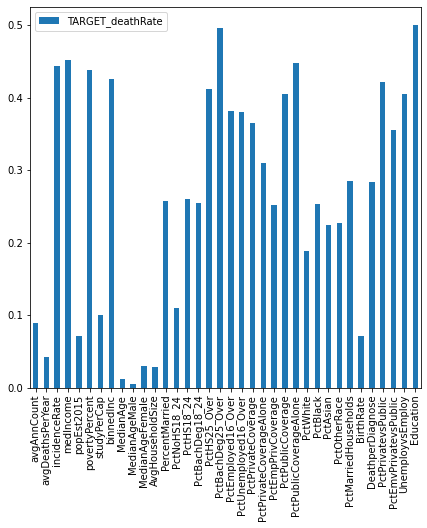

In [ ]:
np.abs(df_cor.drop(['TARGET_deathRate'])).plot(kind = 'bar', figsize = (7, 7))

In [ ]:
important_feature = ['incidenceRate',
 'medIncome',
 'povertyPercent',
 'binnedInc',
 'PctPrivateCoverageAlone',
 'PctPublicCoverageAlone',
 'DeathperDiagnose',
 'PctPrivatevsPublic',
 'PctEmvPrivatevsPublic', 
 'UnemployvsEmploy',
 'Education']

In [ ]:
df2 = df[important_feature]
df2['TARGET_deathRate'] = df['TARGET_deathRate']
df2

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,incidenceRate,medIncome,povertyPercent,binnedInc,PctPrivateCoverageAlone,PctPublicCoverageAlone,DeathperDiagnose,PctPrivatevsPublic,PctEmvPrivatevsPublic,UnemployvsEmploy,Education,TARGET_deathRate
0,6.196037,11.033259,2.501436,11.446420,3.901038,2.708050,0.849497,1.229503,1.064835,0.553680,1.053238,164.9
1,6.022479,10.781619,2.975530,10.810435,4.003690,2.791165,0.826252,1.229654,1.094809,0.538132,1.041182,161.3
2,5.859931,10.806673,2.747271,10.810435,3.795489,3.095578,0.848340,1.107941,0.951432,0.540393,1.200473,174.7
3,6.067036,10.697475,2.895912,10.691120,3.720862,3.258097,0.876894,1.064966,0.934390,0.659995,1.494038,194.8
4,5.861071,10.818898,2.602690,10.810435,3.804438,3.165475,0.811694,1.086717,0.942109,0.451208,1.276084,144.4
...,...,...,...,...,...,...,...,...,...,...,...,...
3042,6.119307,10.757094,2.595255,10.749620,4.023564,2.653242,0.365653,1.254020,1.095353,0.420648,1.257643,149.6
3043,6.119307,10.791585,2.985682,10.810435,3.994524,2.928524,0.499064,1.232005,1.150090,0.404018,1.226166,150.1
3044,6.119307,10.842420,2.772589,10.874210,3.981549,2.879198,0.507763,1.248754,1.171774,0.478066,1.210840,153.9
3045,6.119307,10.834588,2.660260,10.810435,4.048301,2.708050,0.523608,1.270583,1.148117,0.515414,1.321555,175.0


## Độ tương quan

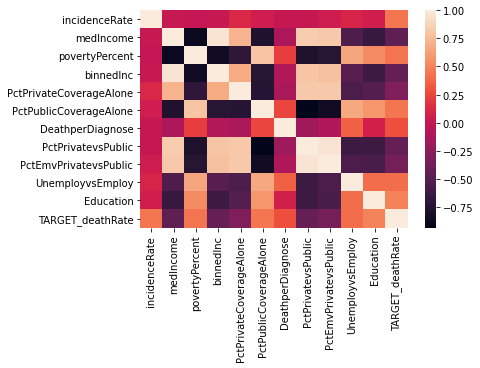

In [ ]:
df2_cor = df2.corr()
sns.heatmap(df2_cor)

## Các Plot

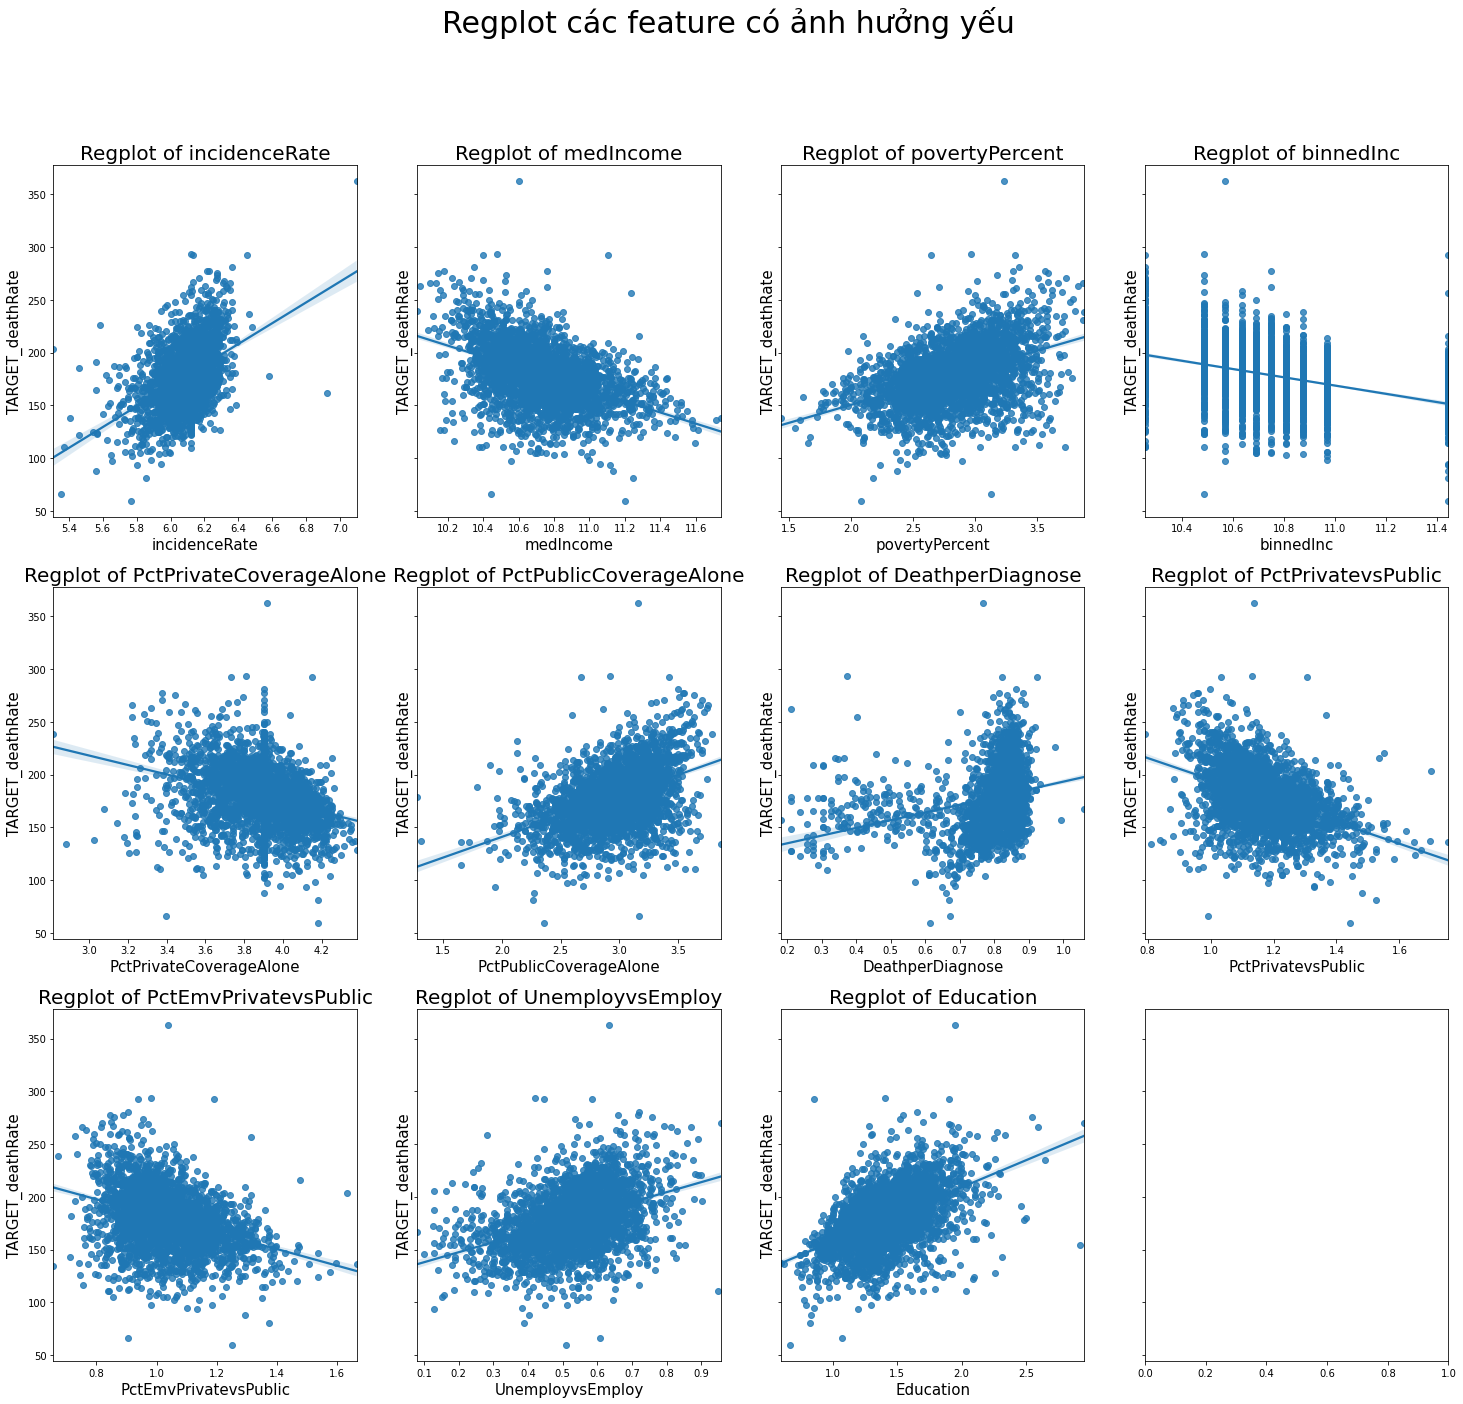

In [ ]:

# Weak effect
row = 3
col = 4

fig, axes = plt.subplots(row, col, figsize = (25, 22), sharey = True)
fig.suptitle('Regplot các feature có ảnh hưởng yếu', fontsize = 30)

i = 0
for r in range(row):
    for c in range(col): 
        if (i == len(important_feature)):
            break
        else:
            sns.regplot(ax = axes[r, c], x = important_feature[i], y = 'TARGET_deathRate', data = df2)
            axes[r, c].set_title('Regplot of ' + important_feature[i], fontsize = 20)
            axes[r, c].set_xlabel(important_feature[i], fontsize = 15)
            axes[r, c].set_ylabel('TARGET_deathRate', fontsize = 15)
            i += 1
plt.show()

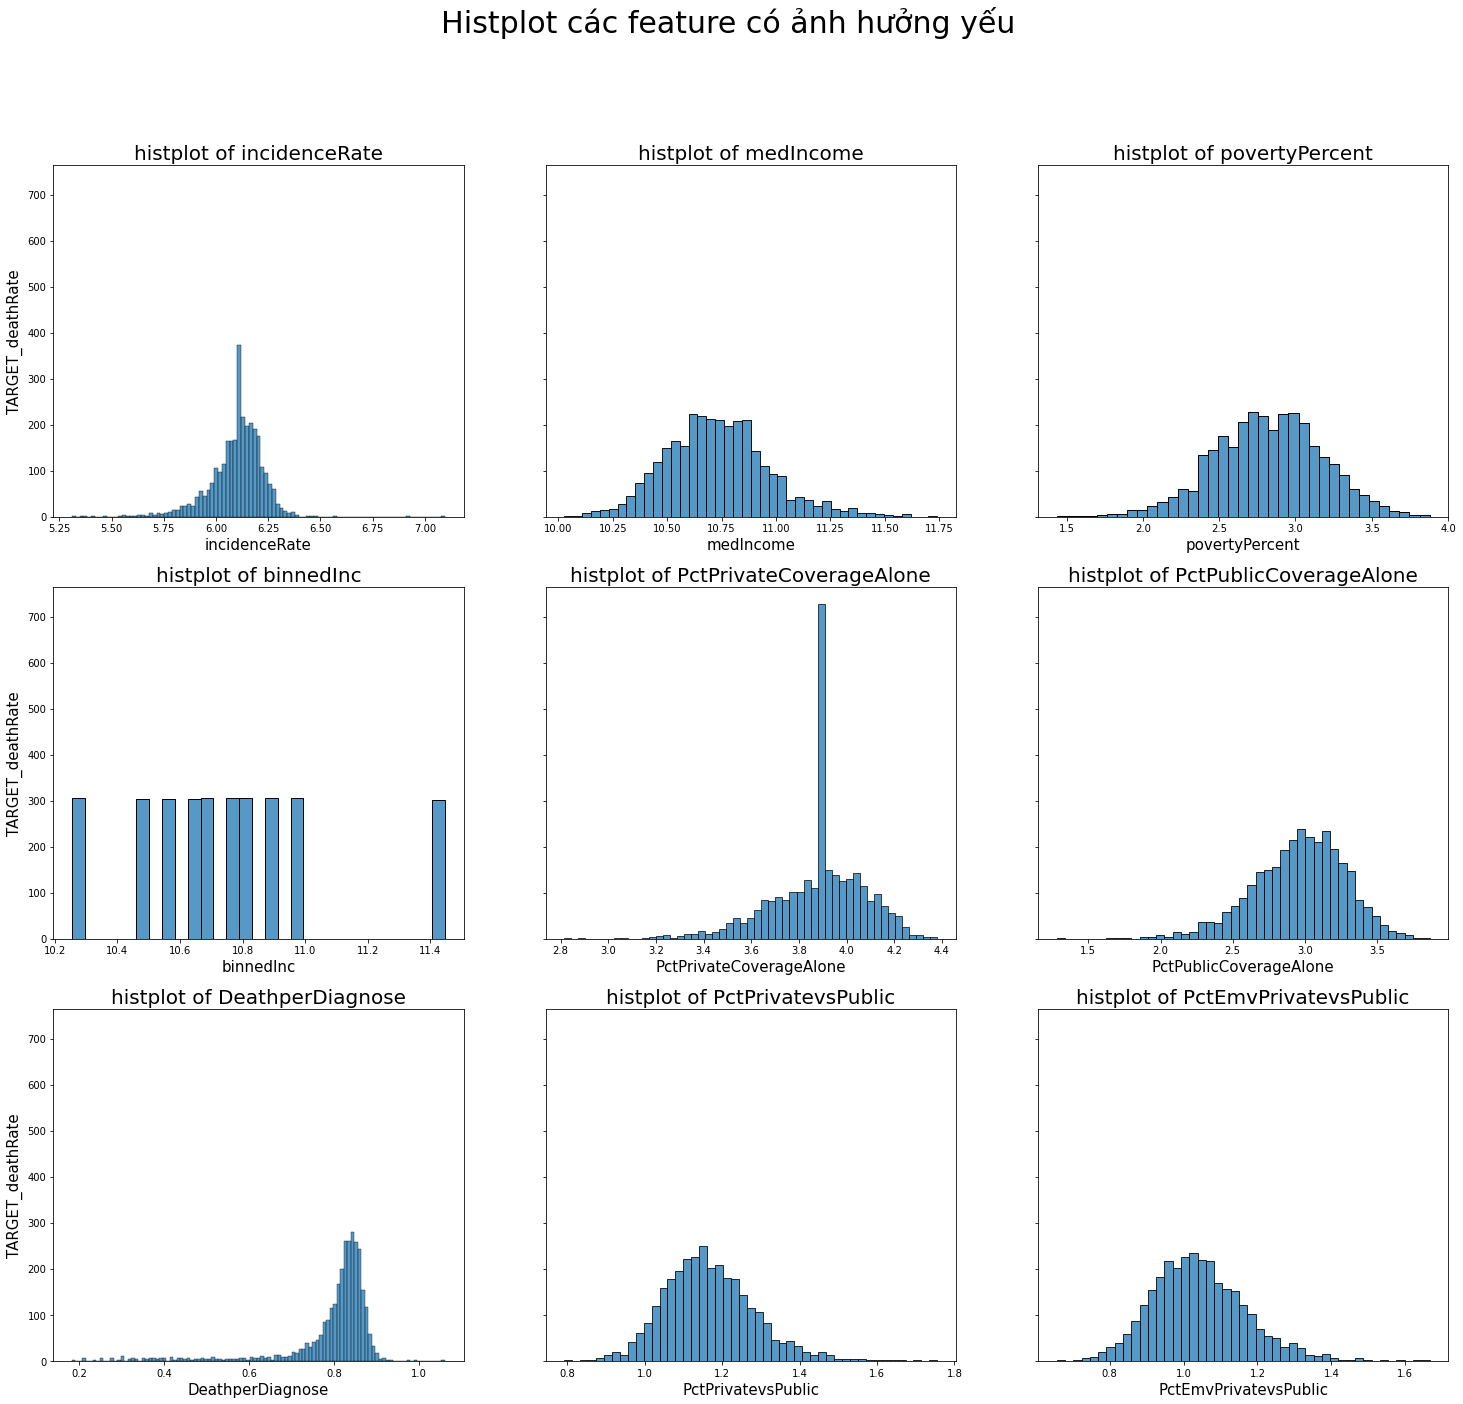

In [ ]:

# Weak effect
row = 3
col = 3

fig, axes = plt.subplots(row, col, figsize = (25, 22), sharey = True)
fig.suptitle('Histplot các feature có ảnh hưởng yếu', fontsize = 30)

i = 0
for r in range(row):
    for c in range(col): 
        if (i == len(important_feature)):
            break
        else:
            sns.histplot(ax = axes[r, c], x = df[important_feature[i]])
            axes[r, c].set_title('histplot of ' + important_feature[i], fontsize = 20)
            axes[r, c].set_xlabel(important_feature[i], fontsize = 15)
            axes[r, c].set_ylabel('TARGET_deathRate', fontsize = 15)
            i += 1
plt.show()

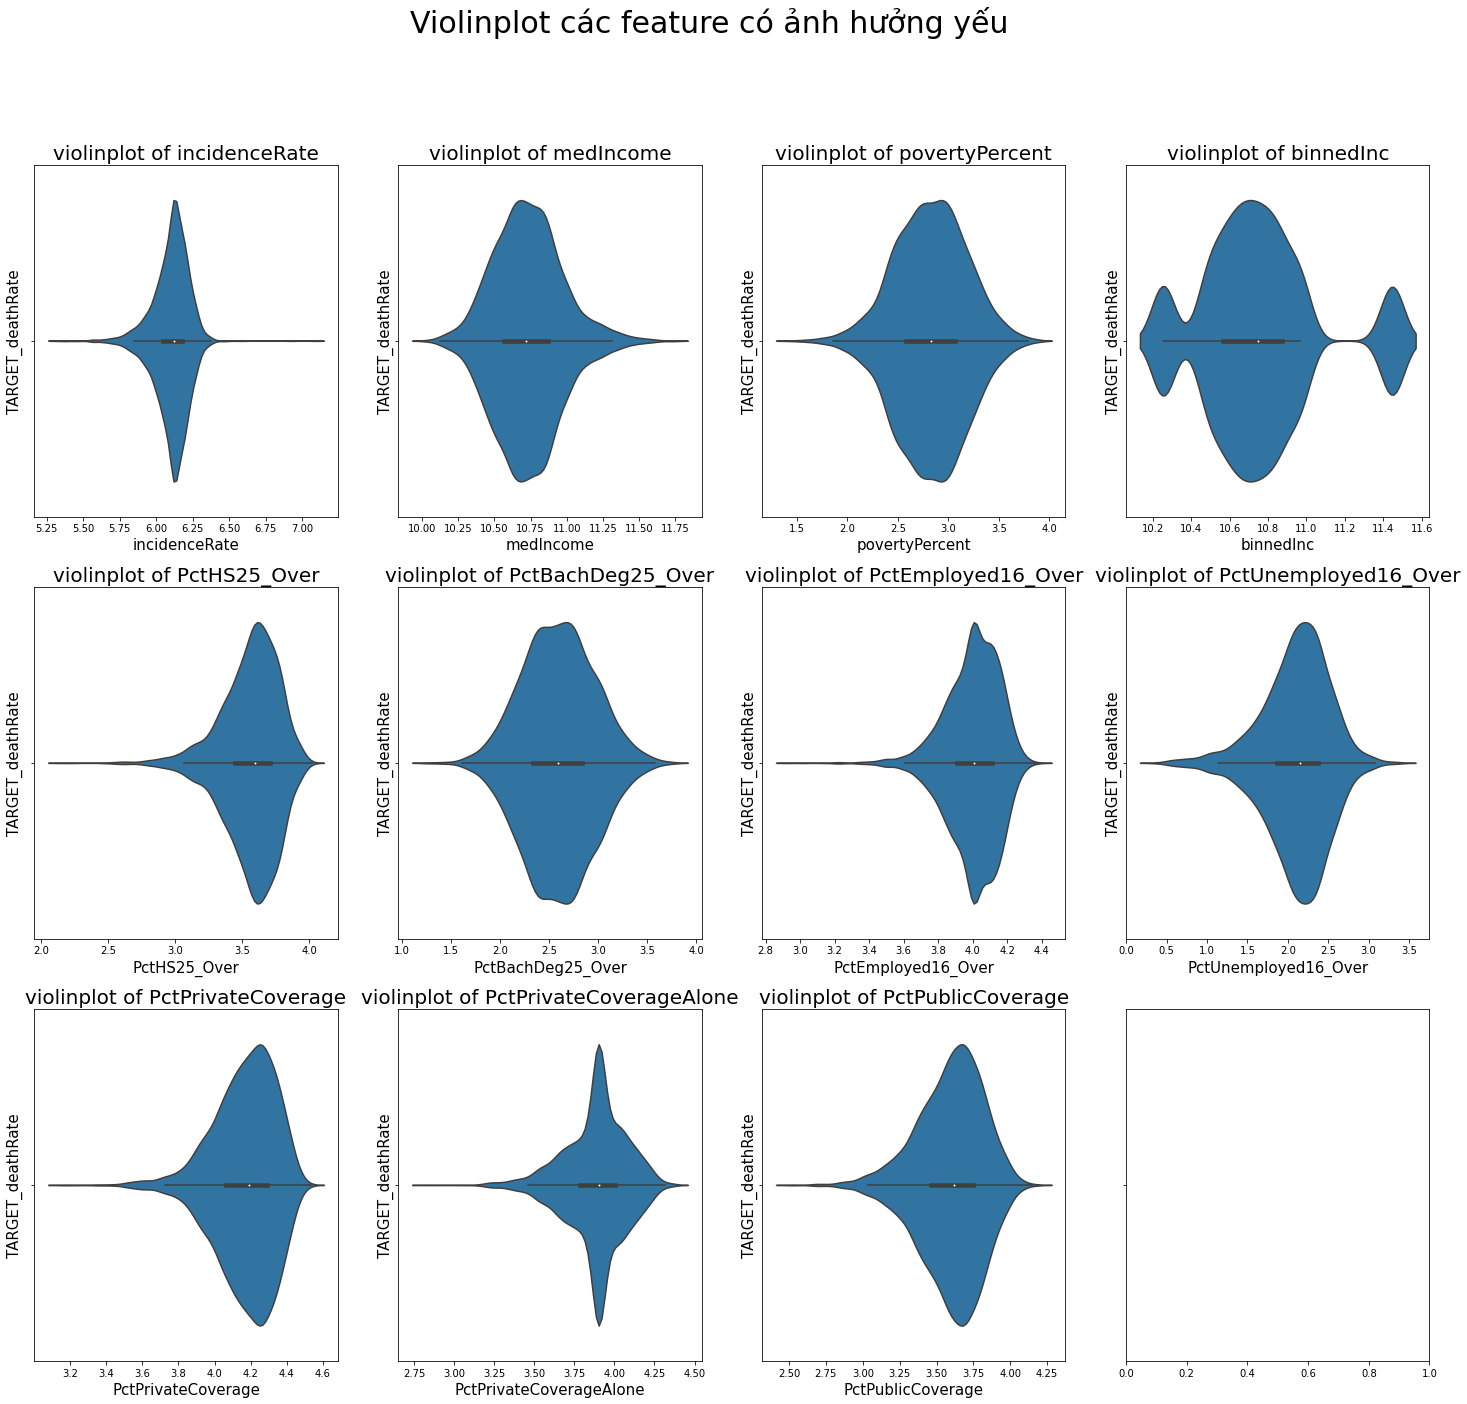

In [ ]:


# Weak effect
row = 3
col = 4

fig, axes = plt.subplots(row, col, figsize = (25, 22), sharey = True)
fig.suptitle('Violinplot các feature có ảnh hưởng yếu', fontsize = 30)

i = 0
for r in range(row):
    for c in range(col): 
        if (i == len(important_feature)):
            break
        else:
            sns.violinplot(ax = axes[r, c], x = cor03[i], data = df)
            axes[r, c].set_title('violinplot of ' + cor03[i], fontsize = 20)
            axes[r, c].set_xlabel(cor03[i], fontsize = 15)
            axes[r, c].set_ylabel('TARGET_deathRate', fontsize = 15)
            i += 1
plt.show()

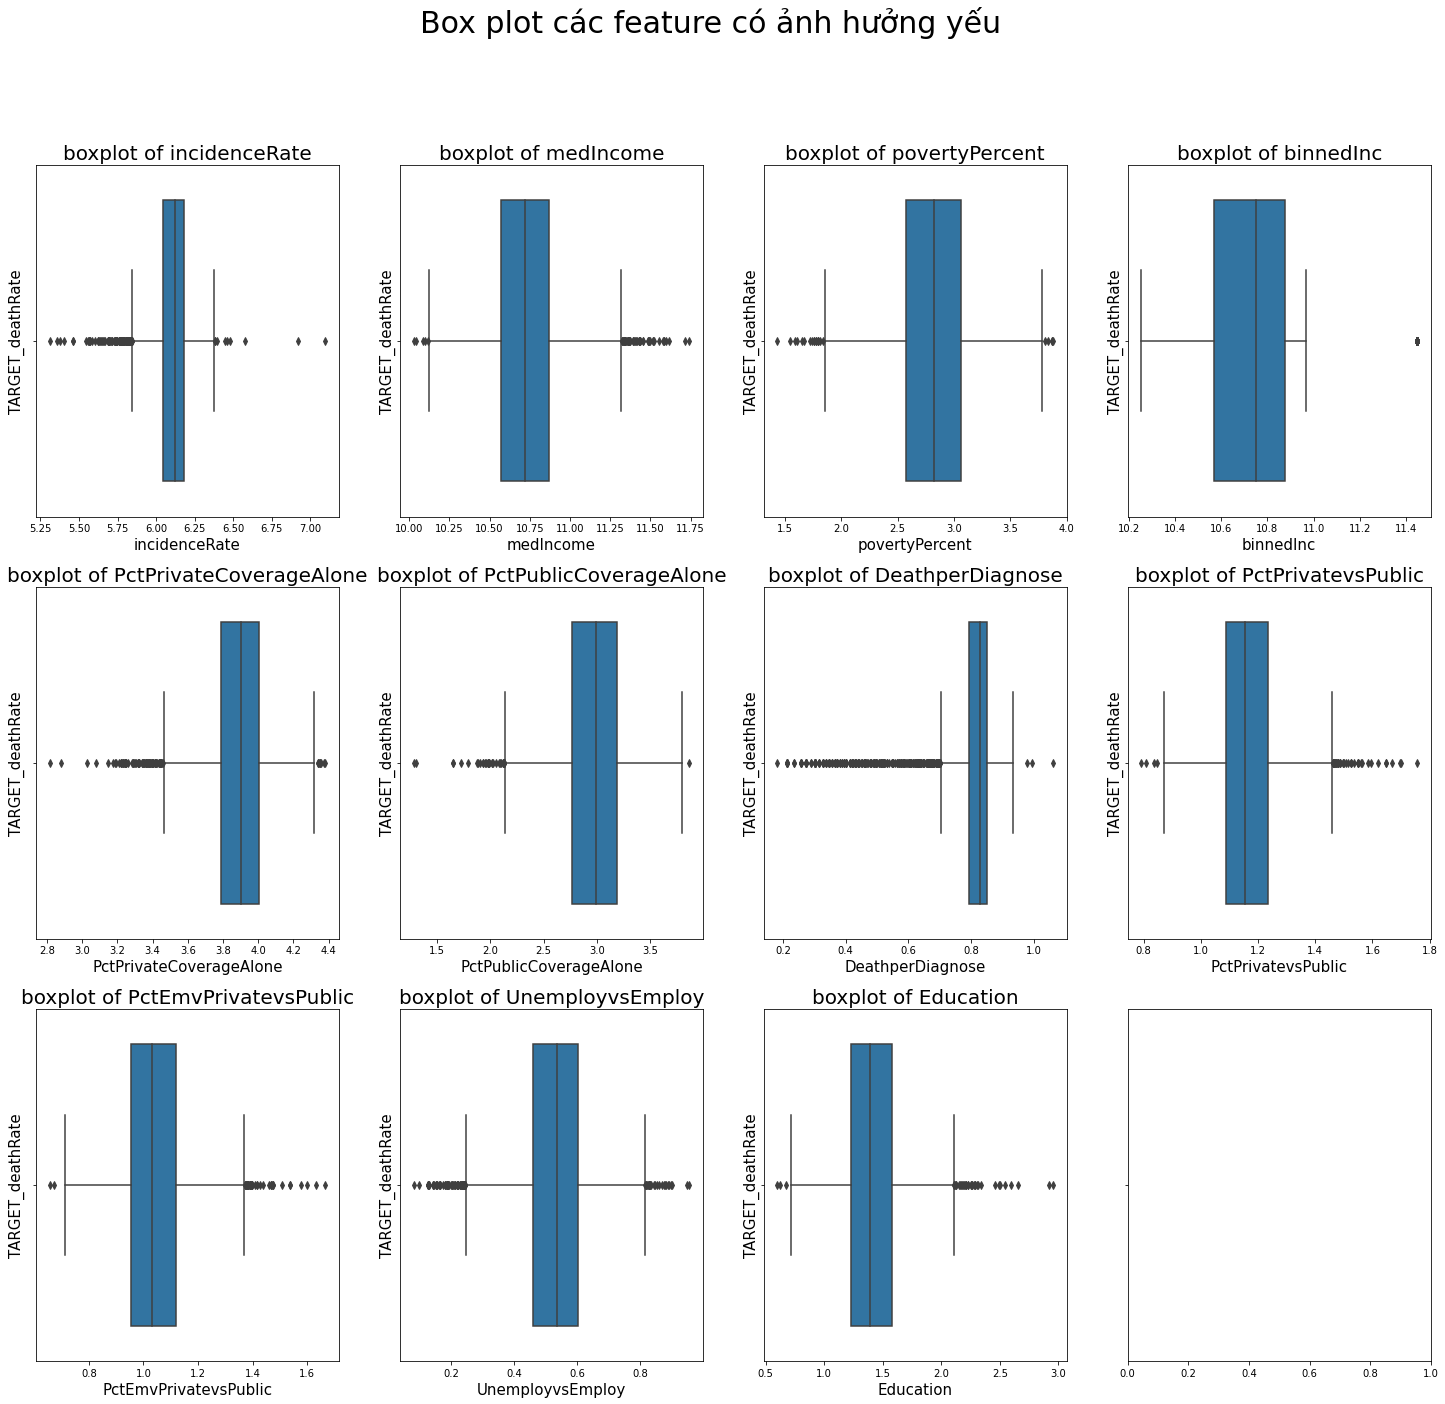

In [ ]:


# Weak effect
row = 3
col = 4

fig, axes = plt.subplots(row, col, figsize = (25, 22), sharey = True)
fig.suptitle('Box plot các feature có ảnh hưởng yếu', fontsize = 30)

i = 0
for r in range(row):
    for c in range(col): 
        if (i == len(important_feature)):
            break
        else:
            sns.boxplot(ax = axes[r, c], x = important_feature[i], data = df2)
            axes[r, c].set_title('boxplot of ' + important_feature[i], fontsize = 20)
            axes[r, c].set_xlabel(important_feature[i], fontsize = 15)
            axes[r, c].set_ylabel('TARGET_deathRate', fontsize = 15)
            i += 1
plt.savefig('boxplot')
plt.show()

# Phát triển mô hình

## Xem phân bố dữ liệu qua regplot và residual plot

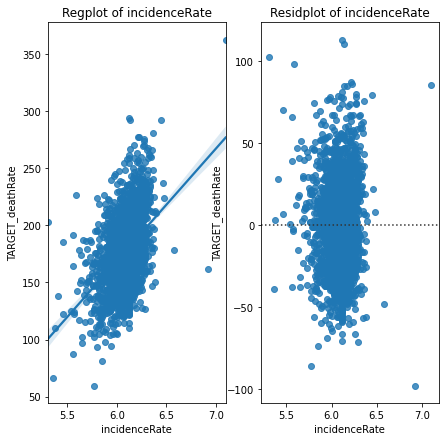

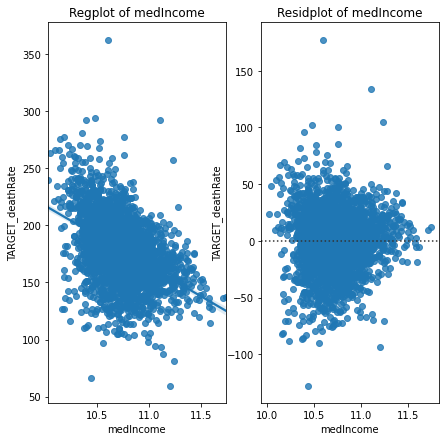

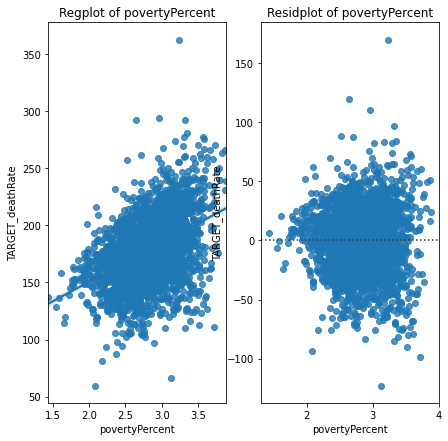

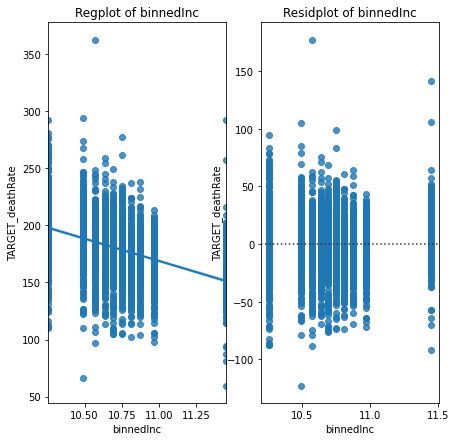

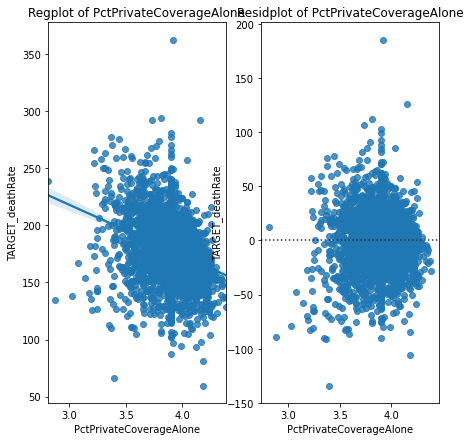

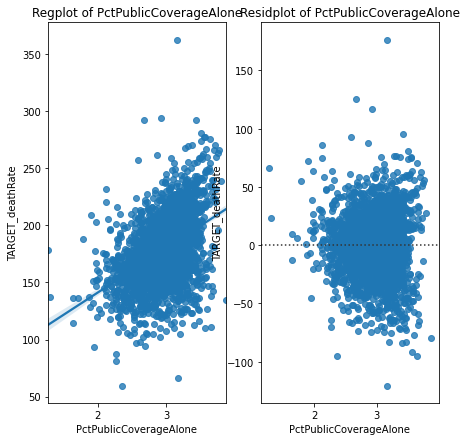

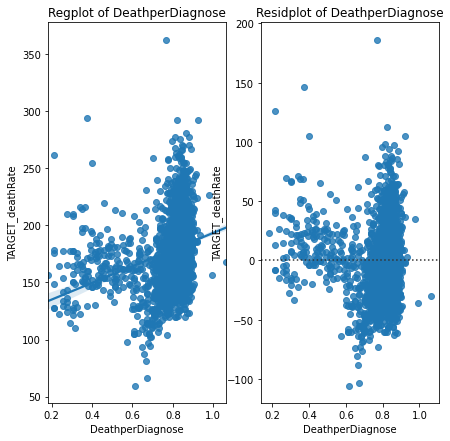

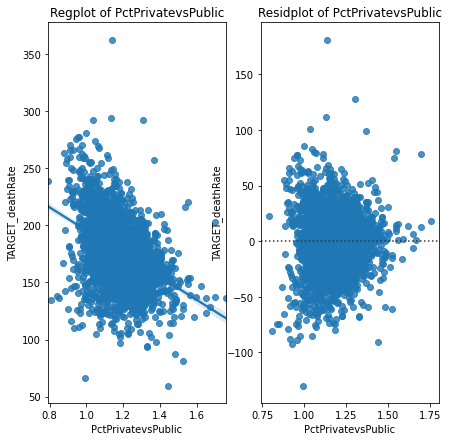

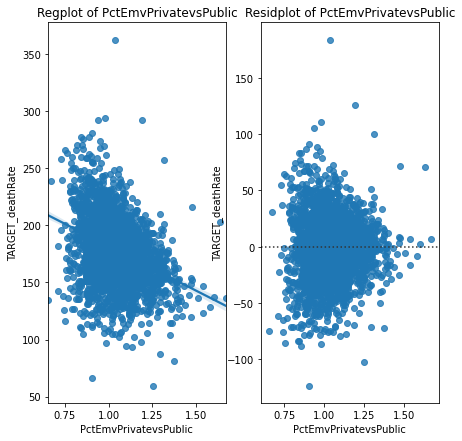

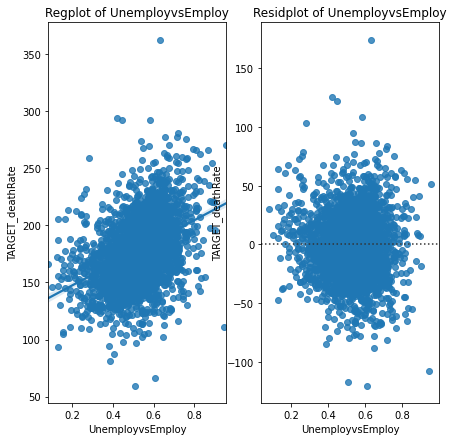

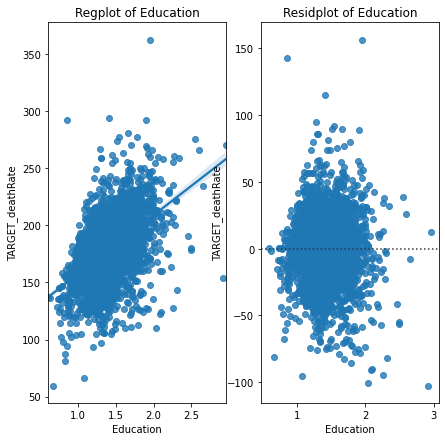

In [ ]:

for i in important_feature:
  plt.figure(figsize = (7, 7))
  plt.subplot(1, 2, 1)
  sns.regplot(x = df2[i], y = df2['TARGET_deathRate'])
  
  plt.title('Regplot of '+ str(i))
  plt.subplot(1, 2, 2)
  sns.residplot(x = df2[i], y = df2['TARGET_deathRate'])
  plt.title('Residplot of '+ str(i))
  plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


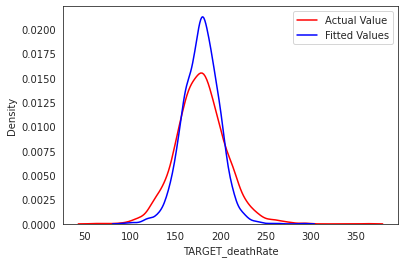

0.517799191712867

In [ ]:
# kiểm tra phù hợp hay không
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures
x = df2.iloc[:, :-1]
y = df2[['TARGET_deathRate']]
sns.set_style("white")

lm = LinearRegression()
lm.fit(x, y)
yhat = lm.predict(x)
ax1 = sns.distplot(df['TARGET_deathRate'], hist = False, color ='r',label='Actual Value')
sns.distplot(yhat , hist=False,color='b',label='Fitted Values',ax=ax1)
plt.legend()
plt.show()
lm.score(x, y)


## Vét cạn cho bộ dữ liệu số 1

In [ ]:
X = df2.iloc[:, :-1]
Y = df2.iloc[:, -1]
X

,incidenceRate,medIncome,povertyPercent,binnedInc,PctPrivateCoverageAlone,PctPublicCoverageAlone,DeathperDiagnose,PctPrivatevsPublic,PctEmvPrivatevsPublic,UnemployvsEmploy,Education
0,6.196037,11.033259,2.501436,11.446420,3.901038,2.708050,0.849497,1.229503,1.064835,0.553680,1.053238
1,6.022479,10.781619,2.975530,10.810435,4.003690,2.791165,0.826252,1.229654,1.094809,0.538132,1.041182
2,5.859931,10.806673,2.747271,10.810435,3.795489,3.095578,0.848340,1.107941,0.951432,0.540393,1.200473
3,6.067036,10.697475,2.895912,10.691120,3.720862,3.258097,0.876894,1.064966,0.934390,0.659995,1.494038
4,5.861071,10.818898,2.602690,10.810435,3.804438,3.165475,0.811694,1.086717,0.942109,0.451208,1.276084
...,...,...,...,...,...,...,...,...,...,...,...
3042,6.119307,10.757094,2.595255,10.749620,4.023564,2.653242,0.365653,1.254020,1.095353,0.420648,1.257643
3043,6.119307,10.791585,2.985682,10.810435,3.994524,2.928524,0.499064,1.232005,1.150090,0.404018,1.226166
3044,6.119307,10.842420,2.772589,10.874210,3.981549,2.879198,0.507763,1.248754,1.171774,0.478066,1.210840
3045,6.119307,10.834588,2.660260,10.810435,4.048301,2.708050,0.523608,1.270583,1.148117,0.515414,1.321555


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test , y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

In [ ]:
def find_subset(list_attr):
  List=[[]]
  array_=[[list_attr[0]]]
  for i in range(len(list_attr)):
    if i==0:
      List+=array_.copy()
    else:
      for j in range(len(array_)):
        a=array_[j].copy()+[list_attr[i]]
        List.append(a)
    array_=List.copy()
  return List

In [ ]:

List  = find_subset(x_train.columns)
List.remove(List[0])
print('Có tổng cộng ', len(List), 'sự kết hợp giữa 11 thuộc tính có thể thực hiện')
print(List)

Có tổng cộng  2047 sự kết hợp giữa 11 thuộc tính có thể thực hiện
[['incidenceRate'], ['medIncome'], ['incidenceRate', 'medIncome'], ['povertyPercent'], ['incidenceRate', 'povertyPercent'], ['medIncome', 'povertyPercent'], ['incidenceRate', 'medIncome', 'povertyPercent'], ['binnedInc'], ['incidenceRate', 'binnedInc'], ['medIncome', 'binnedInc'], ['incidenceRate', 'medIncome', 'binnedInc'], ['povertyPercent', 'binnedInc'], ['incidenceRate', 'povertyPercent', 'binnedInc'], ['medIncome', 'povertyPercent', 'binnedInc'], ['incidenceRate', 'medIncome', 'povertyPercent', 'binnedInc'], ['PctPrivateCoverageAlone'], ['incidenceRate', 'PctPrivateCoverageAlone'], ['medIncome', 'PctPrivateCoverageAlone'], ['incidenceRate', 'medIncome', 'PctPrivateCoverageAlone'], ['povertyPercent', 'PctPrivateCoverageAlone'], ['incidenceRate', 'povertyPercent', 'PctPrivateCoverageAlone'], ['medIncome', 'povertyPercent', 'PctPrivateCoverageAlone'], ['incidenceRate', 'medIncome', 'povertyPercent', 'PctPrivateCoverage

In [ ]:
from sklearn.preprocessing import PolynomialFeatures as PF 
from sklearn.linear_model import LinearRegression as LR
def Poly(X,Y,degree):
  pr=PF(degree=degree)
  X_poly=pr.fit_transform(X)
  lm=LR()
  lm.fit(X_poly,Y)
  return lm, pr 

In [ ]:
def full_poly(subset_list,degree_list):
  Model=[]
  for i in subset_list:
    X=df2[i]
    Y=df['TARGET_deathRate']
    for j in degree_list:
      model, poly =Poly(X,Y,j)
      Model.append([j,i,model, poly])
  return pd.DataFrame(Model,columns=["Degree","Attribute","Model", "Poly"])

In [ ]:
Model = full_poly(List, np.arange(1, 5, 1))
print('Có tổng cộng ', Model.shape[0], ' mô hình từ đơn biến, đa biến và đa thức có bậc tới 4')

Có tổng cộng  8188  mô hình từ đơn biến, đa biến và đa thức có bậc tới 4


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

In [ ]:
def vet_can(Model, x_train, y_train, x_test, X, Y):
  list1 = []
  list2 = []
  for i in range(Model.shape[0]):
    model = Model.iloc[i, 2]
    att = Model.iloc[i, 1]
    poly = Model.iloc[i, 3]
    degree = Model.iloc[i, 0]
    
    # thêm vào tên loại mô hình
    if(len(att) ==1):
      list2.append('Simple Linear Regression')
    elif (len(att) >1 and ( degree> 1)):
      list2.append('Polynormial Regression')
    elif (len(att) >1 and ( degree== 1)): 
      list2.append('Multiple Linear Regression')
    
    # thêm vào tên các thuộc tính
    list2.append(att)
    
    # thêm vào hệ số R^2 train
    xpolytrain = poly.transform(x_train[att])
    xpoly = poly.transform(X[att])
    R2train = model.score(xpolytrain, y_train)
    list2.append(R2train)

    # thêm vào hệ số R^2 test
    xpolytest = poly.transform(x_test[att])
    R2test = model.score(xpolytest, y_test)
    list2.append(R2test)

    # thêm vào hệ số RMSE
    rmse = np.sqrt(mean_squared_error(Y,model.predict(xpoly)))
    list2.append(rmse)

    # thêm vào độ chính xác trung bình trên cross validation = 4
    if(degree ==1 ):
      scores = cross_val_score(LR(), X[att], Y, cv=4)
      list2.append(str(np.mean(scores)))
    if(degree > 1):
      scores = cross_val_score(LR(), xpoly, Y, cv=4)
      list2.append(str(np.mean(scores)))

    # thêm vào độ lệch chuẩn độ chính xác trung bình trên cross validation = 4
    if(degree ==1 ):
      scores = cross_val_score(LR(), X[att], Y, cv=4)
      list2.append(str(np.std(scores)))
    if(degree > 1):
      scores = cross_val_score(LR(), xpoly, Y, cv=4)
      list2.append(str(np.std(scores)))

    # thêm vào độ chính xác trung bình trên cross validation = 5
    if(degree ==1 ):
      scores = cross_val_score(LR(), X[att], Y, cv=5)
      list2.append(str(np.mean(scores)))
    if(degree > 1):
      scores = cross_val_score(LR(), xpoly, Y, cv=5)
      list2.append(str(np.mean(scores)))

    # thêm vào độ lệch chuẩn độ chính xác trung bình trên cross validation = 5
    if(degree ==1 ):
      scores = cross_val_score(LR(), X[att], Y, cv=5)
      list2.append(str(np.std(scores)))
    if(degree > 1):
      scores = cross_val_score(LR(), xpoly, Y, cv=5)
      list2.append(str(np.std(scores)))
    list2.append('Degree = ' + str(degree))
    
    list1.append(list2)
    list2 = []
  return list1

In [ ]:
list1 = vet_can(Model, x_train, y_train, x_test, X, Y)

In [ ]:
df4 = pd.DataFrame(list1, columns = ['Model', "Feature Detail", 'R2train', 'R2test', 'Rmse' , '4-Fold Validation Mean', '4-Fold Validation Std', '5-Fold Validation Mean',  '5-Fold Validation Std', "Note" ])
df4 = df4.sort_values('5-Fold Validation Mean', ascending=False)
df4['4-Fold Validation Mean'] = df4['4-Fold Validation Mean'].astype('float')
df4['5-Fold Validation Mean'] = df4['5-Fold Validation Mean'].astype('float')
df4['5-Fold Validation Std'] = df4['5-Fold Validation Std'].astype('float')
df4['4-Fold Validation Std'] = df4['4-Fold Validation Std'].astype('float')
df4.to_csv('Huong1.csv')

In [ ]:
df4.head()

,Model,Feature Detail,R2train,R2test,Rmse,4-Fold Validation Mean,4-Fold Validation Std,5-Fold Validation Mean,5-Fold Validation Std,Note
6434,Polynormial Regression,"[incidenceRate, binnedInc, DeathperDiagnose, U...",0.665429,0.659126,16.097283,0.589795,0.018069,0.586982,0.085637,Degree = 3
6410,Polynormial Regression,"[incidenceRate, medIncome, DeathperDiagnose, U...",0.668051,0.669489,15.975372,0.587900,0.026231,0.586559,0.090948,Degree = 3
7498,Polynormial Regression,"[incidenceRate, medIncome, PctPrivateCoverageA...",0.698224,0.682260,15.369934,0.574603,0.038473,0.584469,0.073979,Degree = 3
5898,Polynormial Regression,"[incidenceRate, medIncome, DeathperDiagnose, P...",0.680492,0.675135,15.725610,0.575799,0.030721,0.584181,0.090324,Degree = 3
6442,Polynormial Regression,"[incidenceRate, medIncome, binnedInc, Deathper...",0.675266,0.676668,15.800847,0.587635,0.020557,0.582470,0.078672,Degree = 3


In [ ]:

df5 = df4[df4['5-Fold Validation Mean'] > 0.5]
df5

,Model,Feature Detail,R2train,R2test,Rmse,4-Fold Validation Mean,4-Fold Validation Std,5-Fold Validation Mean,5-Fold Validation Std,Note
6434,Polynormial Regression,"[incidenceRate, binnedInc, DeathperDiagnose, U...",0.665429,0.659126,16.097283,0.589795,0.018069,0.586982,0.085637,Degree = 3
6410,Polynormial Regression,"[incidenceRate, medIncome, DeathperDiagnose, U...",0.668051,0.669489,15.975372,0.587900,0.026231,0.586559,0.090948,Degree = 3
7498,Polynormial Regression,"[incidenceRate, medIncome, PctPrivateCoverageA...",0.698224,0.682260,15.369934,0.574603,0.038473,0.584469,0.073979,Degree = 3
5898,Polynormial Regression,"[incidenceRate, medIncome, DeathperDiagnose, P...",0.680492,0.675135,15.725610,0.575799,0.030721,0.584181,0.090324,Degree = 3
6442,Polynormial Regression,"[incidenceRate, medIncome, binnedInc, Deathper...",0.675266,0.676668,15.800847,0.587635,0.020557,0.582470,0.078672,Degree = 3
...,...,...,...,...,...,...,...,...,...,...
1930,Polynormial Regression,"[incidenceRate, medIncome, PctPublicCoverageAl...",0.618034,0.647497,16.937295,0.507341,0.045106,0.501194,0.089709,Degree = 3
7665,Polynormial Regression,"[incidenceRate, povertyPercent, binnedInc, Pct...",0.619582,0.605846,17.211500,0.496468,0.097086,0.501145,0.125050,Degree = 2
803,Polynormial Regression,"[incidenceRate, binnedInc, DeathperDiagnose, P...",0.608740,0.623517,17.251561,0.488880,0.024087,0.500943,0.091245,Degree = 4
3018,Polynormial Regression,"[incidenceRate, medIncome, PctPrivateCoverageA...",0.633349,0.649650,16.682248,0.499645,0.041401,0.500056,0.085007,Degree = 3


In [ ]:
df5['Note'].value_counts()

Degree = 2    251
Degree = 3    223
Degree = 4      5
Name: Note, dtype: int64

# Tổng kết 


Mô hình cho kết quả tốt nhất là mô hình Polynomial Regression bậc 3 với các thuộc tính ['incidenceRate', 'binnedInc', 'DeathperDiagnose', 'UnemployvsEmploy', 'Education']. Với các hệ số 5-fold mean, R2-test và RMSE lần lượt là 0.58, 0.65 và 16.09.